#Análisis de Datos de Precios en Diferentes Nodos (pml y pml.1)
Este jupyter noteebook realiza una serie de análisis sobre un conjunto de datos de precios, incluyendo limpieza de datos, análisis de correlación, regresión lineal y análisis temporal de precios.


In [ ]:
# Importando las bibliotecas necesarias
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import statsmodels.api as sm
import seaborn as sns

In [ ]:
# Configuración para mejorar la estética de las gráficas
sns.set(style="whitegrid")

In [ ]:
# Cargar y explorar los datos
file_path = 'Data.csv'
try:
    data = pd.read_csv(file_path)
    print("Datos cargados con éxito. Aquí están las primeras filas:")
    print(data.head())
except Exception as e:
    print(f"Ocurrió un error al cargar los datos: {e}")



Datos cargados con éxito. Aquí están las primeras filas:
   Unnamed: 0       fecha  hora     pml     fecha.1  hora.1   pml.1
0           0  01/01/2020   1.0  343.14  01/01/2020       1  307.57
1           1  01/01/2020   2.0  740.14  01/01/2020       2  286.07
2           2  01/01/2020   3.0  725.76  01/01/2020       3  270.92
3           3  01/01/2020   4.0  344.51  01/01/2020       4  262.38
4           4  01/01/2020   5.0  343.90  01/01/2020       5  242.60


In [ ]:
# Documentación y Análisis Exploratorio de Datos
print("\nAnálisis Exploratorio Inicial:")
print(f"- Total de filas y columnas: {data.shape}")
print(f"- Resumen estadístico:\n{data.describe()}")
print(f"- Información del DataFrame:\n{data.info()}")



Análisis Exploratorio Inicial:
- Total de filas y columnas: (33600, 7)
- Resumen estadístico:
         Unnamed: 0          hora           pml        hora.1         pml.1
count  33600.000000  33599.000000  33599.000000  33600.000000  33600.000000
mean   16799.500000     12.499747   1085.799768     12.500089    784.645919
std     9699.628859      6.922263   1167.059394      6.922444   1244.457012
min        0.000000      1.000000  -1500.000000      1.000000   -553.630000
25%     8399.750000      6.500000    453.485000      6.750000    447.177500
50%    16799.500000     12.000000    745.880000     12.500000    639.215000
75%    25199.250000     18.000000   1321.520000     18.250000    896.342500
max    33599.000000     25.000000  17475.710000     25.000000  38160.000000
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33600 entries, 0 to 33599
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  33600 non-null

## Preparación y limpieza de datos (Data cleaning)

Eliminar la columna Unnamed: 0.

Verificar y manejar cualquier valor faltante o incoherente.

Asegurar que las fechas y horas estén en un formato adecuado.

In [ ]:
# Eliminar la columna 'Unnamed: 0'
data_cleaned = data.drop(columns=['Unnamed: 0'])

# Verificar valores faltantes antes de las transformaciones
missing_values = data_cleaned.isnull().sum()

# Convertir las columnas de fecha a formato de fecha
data_cleaned['fecha'] = pd.to_datetime(data_cleaned['fecha'], errors='coerce')
data_cleaned['fecha.1'] = pd.to_datetime(data_cleaned['fecha.1'], errors='coerce')

# Asegurar que las horas sean enteros y llenar valores faltantes con 0
data_cleaned['hora'] = data_cleaned['hora'].fillna(0).astype(int)
data_cleaned['hora.1'] = data_cleaned['hora.1'].fillna(0).astype(int)

# Verificar valores faltantes después de las conversiones
missing_values_after = data_cleaned.isnull().sum()

# Mostrar las primeras filas del DataFrame limpio
cleaned_data_head = data_cleaned.head()

print("DataFrame después de la limpieza:")
print(cleaned_data_head)

print("\nValores faltantes antes de las transformaciones:")
print(missing_values)

print("\nValores faltantes después de las transformaciones:")
print(missing_values_after)



DataFrame después de la limpieza:
       fecha  hora     pml    fecha.1  hora.1   pml.1  mes
0 2020-01-01     1  343.14 2020-01-01       1  307.57  1.0
1 2020-01-01     2  740.14 2020-01-01       2  286.07  1.0
2 2020-01-01     3  725.76 2020-01-01       3  270.92  1.0
3 2020-01-01     4  344.51 2020-01-01       4  262.38  1.0
4 2020-01-01     5  343.90 2020-01-01       5  242.60  1.0

Valores faltantes antes de las transformaciones:
fecha      1
hora       1
pml        1
fecha.1    0
hora.1     0
pml.1      0
mes        1
dtype: int64

Valores faltantes después de las transformaciones:
fecha      1
hora       0
pml        1
fecha.1    0
hora.1     0
pml.1      0
mes        1
dtype: int64


<ipython-input-111-351efa8afcd2>:9: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_cleaned['fecha.1'] = pd.to_datetime(data_cleaned['fecha.1'], errors='coerce')


## Análisis de correlación entre los precios (pml y pml.1) de los dos nodos. ​​

In [ ]:
# Eliminar filas con valores faltantes
data_cleaned = data_cleaned.dropna()

# Calcular la correlación entre 'pml' y 'pml.1'
correlation = data_cleaned[['pml', 'pml.1']].corr()

correlation



,pml,pml.1
pml,1.000000,0.149736
pml.1,0.149736,1.000000


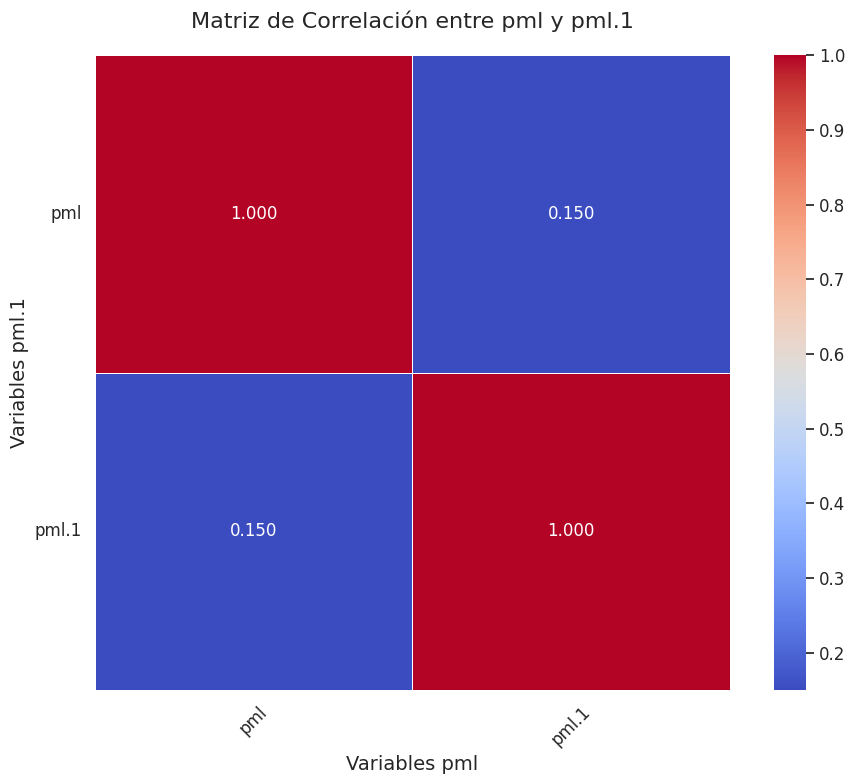

In [ ]:
# Configurando el estilo del gráfico
sns.set(style="white")
plt.figure(figsize=(10, 8))

# Creando la matriz de correlación con un mapa de calor
heatmap = sns.heatmap(correlation, annot=True, fmt=".3f", cmap='coolwarm', cbar=True, square=True, linewidths=.5)

# Añadiendo títulos y etiquetas
plt.title('Matriz de Correlación entre pml y pml.1', fontsize=16, pad=20)
plt.xlabel('Variables pml', fontsize=14)
plt.ylabel('Variables pml.1', fontsize=14)
plt.xticks(rotation=45, fontsize=12)
plt.yticks(rotation=0, fontsize=12)

# Añadiendo un mapa de color más legible
cbar = heatmap.collections[0].colorbar
cbar.ax.tick_params(labelsize=12)

# Ajustando el espaciado
plt.tight_layout()

# Mostrando el gráfico
plt.show()

### Esta correlación es relativamente baja, lo que indica que, aunque hay alguna relación entre los precios en ambos nodos, no es muy fuerte. Los precios en un nodo no parecen ser predictores muy precisos de los precios en el otro nodo.

## Regresión lineal

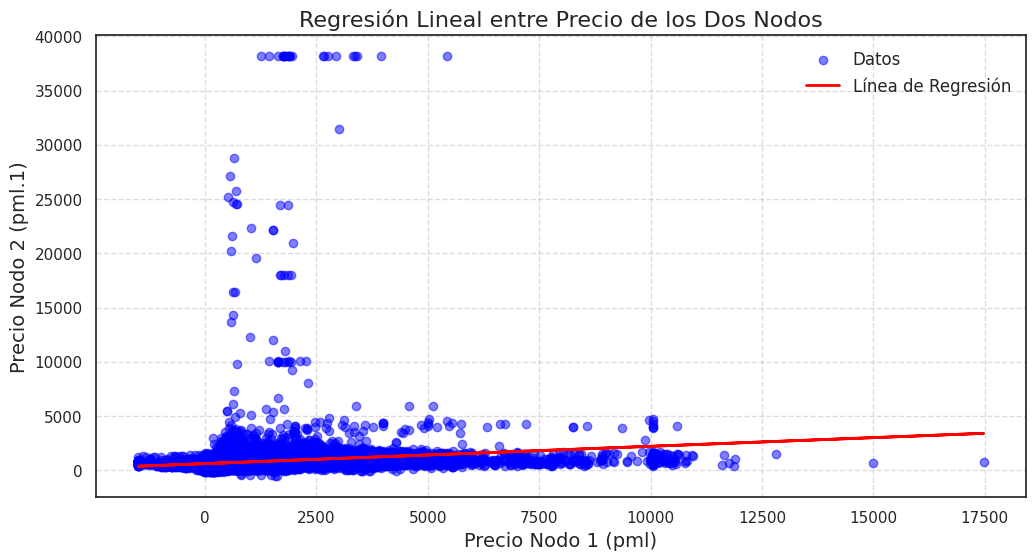

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  pml.1   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.022
Method:                 Least Squares   F-statistic:                     770.6
Date:                Mon, 18 Dec 2023   Prob (F-statistic):          1.07e-167
Time:                        14:15:20   Log-Likelihood:            -2.8674e+05
No. Observations:               33599   AIC:                         5.735e+05
Df Residuals:                   33597   BIC:                         5.735e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        611.2879      9.169     66.670      0.000     593.317     629.259
pml            0.1597      0.006     27.759      0.000       0.148       0.171
==============================================================================
Omnibus:                    78377.590   Durbin-Watson:                   0.123
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        593001490.717
Skew:                          23.406   Prob(JB):                         0.00
Kurtosis:                     652.148   Cond. No.                     2.18e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.18e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [ ]:
# Preparar los datos para la regresión
X = data_cleaned['pml']  # Variable independiente
y = data_cleaned['pml.1']  # Variable dependiente
X = sm.add_constant(X)  # Agregar una constante al modelo

# Realizar la regresión lineal
model = sm.OLS(y, X).fit()

# Resumen de la regresión
regression_summary = model.summary()

# Gráfico de dispersión y línea de regresión
plt.figure(figsize=(12, 6))

# Gráfico de dispersión de datos
plt.scatter(data_cleaned['pml'], data_cleaned['pml.1'], alpha=0.5, label='Datos', color='blue')

# Línea de regresión
plt.plot(data_cleaned['pml'], model.predict(X), color='red', linewidth=2, label='Línea de Regresión')

# Título y etiquetas
plt.title('Regresión Lineal entre Precio de los Dos Nodos', fontsize=16)
plt.xlabel('Precio Nodo 1 (pml)', fontsize=14)
plt.ylabel('Precio Nodo 2 (pml.1)', fontsize=14)

# Leyenda
plt.legend(fontsize=12)

# Cuadrícula
plt.grid(True, linestyle='--', alpha=0.7)

# Mostrar la gráfica
plt.show()

# Imprimir el resumen de la regresión
regression_summary


### El gráfico muestra la dispersión de los datos junto con la línea de regresión lineal. Se puede observar que, aunque hay una tendencia positiva, la dispersión de los puntos es bastante amplia, lo que respalda la conclusión de una relación no muy fuerte entre los precios de los nodos.




## Calcular el promedio por hora de cada una de las 24 horas para describir el comportamiento diario de los precios.

<ipython-input-104-1a31cceb923d>:7: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_cleaned['fecha'] = pd.to_datetime(data_cleaned['fecha'], errors='coerce')
<ipython-input-104-1a31cceb923d>:8: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data_cleaned['fecha.1'] = pd.to_datetime(data_cleaned['fecha.1'], errors='coerce')
<ipython-input-104-1a31cceb923d>:25: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')


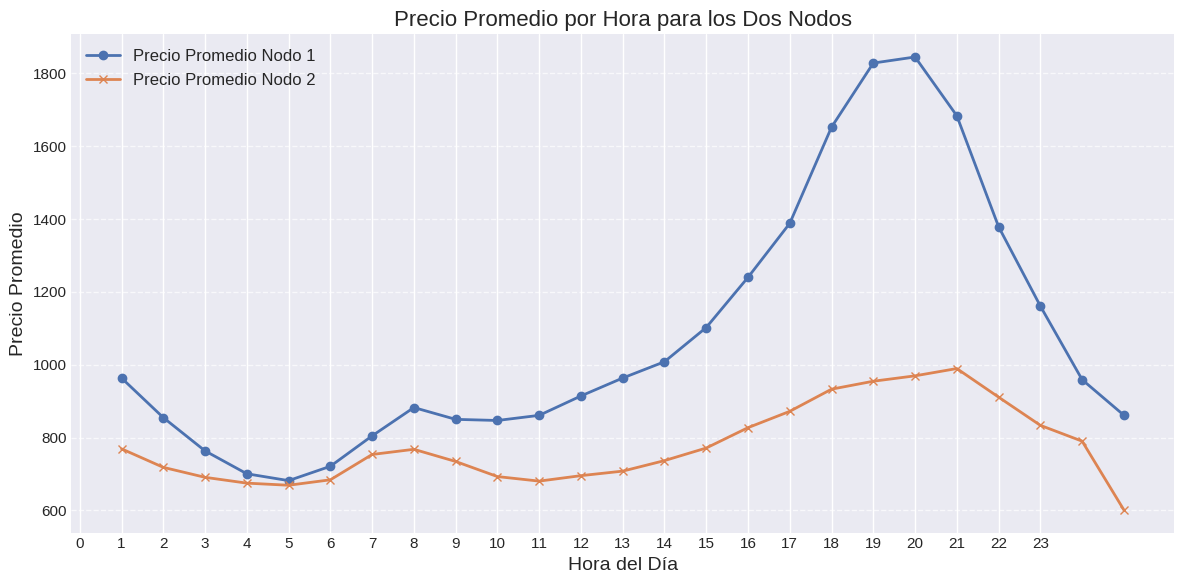

,Hora,Precio Promedio Nodo 1,Precio Promedio Nodo 2
0,1,963.686279,769.277950
1,2,855.068671,718.443371
2,3,763.624729,691.051529
3,4,700.807086,675.110586
4,5,682.015129,669.309286
5,6,721.355321,684.256579
6,7,804.897179,753.802021
7,8,882.672207,767.984857
8,9,850.214550,734.581557
9,10,847.140200,693.123164


In [ ]:
# Recargando los datos
file_path = 'Data.csv'
data = pd.read_csv(file_path)

# Limpieza de datos
data_cleaned = data.drop(columns=['Unnamed: 0'])
data_cleaned['fecha'] = pd.to_datetime(data_cleaned['fecha'], errors='coerce')
data_cleaned['fecha.1'] = pd.to_datetime(data_cleaned['fecha.1'], errors='coerce')
data_cleaned['hora'] = data_cleaned['hora'].fillna(0).astype(int)
data_cleaned['hora.1'] = data_cleaned['hora.1'].fillna(0).astype(int)
data_cleaned = data_cleaned.dropna()

# Calcular el promedio por hora para cada nodo
hourly_avg_pml = data_cleaned.groupby('hora')['pml'].mean()
hourly_avg_pml1 = data_cleaned.groupby('hora')['pml.1'].mean()

# Crear un DataFrame para las visualizaciones
hourly_avg = pd.DataFrame({
    'Hora': hourly_avg_pml.index,
    'Precio Promedio Nodo 1': hourly_avg_pml.values,
    'Precio Promedio Nodo 2': hourly_avg_pml1.values
})

# Configuración de estilo
plt.style.use('seaborn-darkgrid')
plt.figure(figsize=(12, 6))

# Gráfico de líneas para los promedios por hora
plt.plot(hourly_avg['Hora'], hourly_avg['Precio Promedio Nodo 1'], label='Precio Promedio Nodo 1', marker='o', linewidth=2)
plt.plot(hourly_avg['Hora'], hourly_avg['Precio Promedio Nodo 2'], label='Precio Promedio Nodo 2', marker='x', linewidth=2)

# Título y etiquetas
plt.title('Precio Promedio por Hora para los Dos Nodos', fontsize=16)
plt.xlabel('Hora del Día', fontsize=14)
plt.ylabel('Precio Promedio', fontsize=14)

# Ejes y leyenda
plt.xticks(np.arange(0, 24, 1))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(fontsize=12)

# Personalizar el diseño
plt.tight_layout()

# Mostrar la gráfica
plt.show()

# Visualización de los datos
hourly_avg

## Encontrar qué mes tiende a ser el más caro y cuál tiende a ser el más barato.


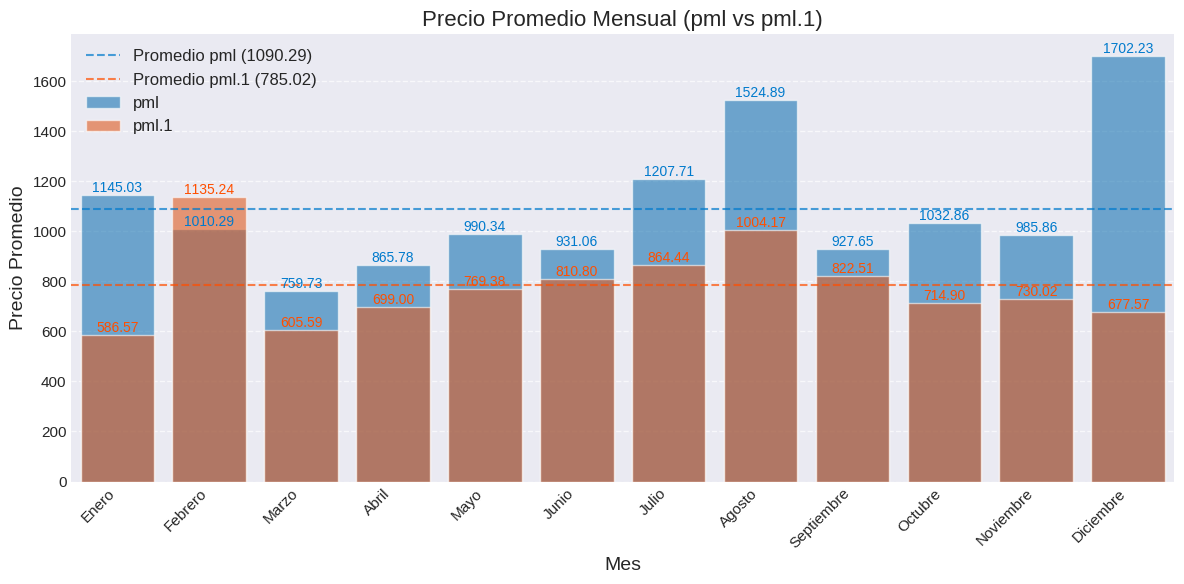

,mes,pml,pml.1
0,1,1145.031024,586.571693
1,2,1010.287721,1135.236532
2,3,759.726036,605.589614
3,4,865.779297,699.000989
4,5,990.335342,769.379723
5,6,931.063487,810.801271
6,7,1207.709222,864.440061
7,8,1524.891083,1004.171691
8,9,927.645572,822.507602
9,10,1032.859768,714.900273


In [ ]:


# Asegurándonos de que las fechas estén en formato correcto
data_cleaned['fecha'] = pd.to_datetime(data_cleaned['fecha'], errors='coerce')
data_cleaned['fecha.1'] = pd.to_datetime(data_cleaned['fecha.1'], errors='coerce')

# Extrayendo el mes de las fechas
data_cleaned['mes'] = data_cleaned['fecha'].dt.month

# Calculando el precio promedio por mes
monthly_average = data_cleaned.groupby('mes')[['pml', 'pml.1']].mean().reset_index()

# Definir colores personalizados
colors = ['#007ACC', '#FF4F00']

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 6))

# Gráfico de barras
for i, col in enumerate(['pml', 'pml.1']):
    sns.barplot(x='mes', y=col, data=monthly_average, color=colors[i], alpha=0.6, label=col)

# Título y etiquetas
plt.title('Precio Promedio Mensual (pml vs pml.1)', fontsize=16)
plt.xlabel('Mes', fontsize=14)
plt.ylabel('Precio Promedio', fontsize=14)
plt.legend(fontsize=12)
plt.xticks(np.arange(12), ['Enero', 'Febrero', 'Marzo', 'Abril', 'Mayo', 'Junio', 'Julio', 'Agosto', 'Septiembre', 'Octubre', 'Noviembre', 'Diciembre'], rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Agregar anotaciones de valor en las barras
for i, col in enumerate(['pml', 'pml.1']):
    for index, value in enumerate(monthly_average[col]):
        plt.text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10, color=colors[i])

# Añadir línea horizontal promedio
average_line = monthly_average[['pml', 'pml.1']].mean()
plt.axhline(y=average_line[0], color=colors[0], linestyle='--', label=f'Promedio pml ({average_line[0]:.2f})', alpha=0.7)
plt.axhline(y=average_line[1], color=colors[1], linestyle='--', label=f'Promedio pml.1 ({average_line[1]:.2f})', alpha=0.7)

# Personalizar el diseño
sns.despine()
plt.tight_layout()

# Mostrar la gráfica
plt.legend(fontsize=12, loc='upper left')
plt.show()

monthly_average.head(24)



In [ ]:
# Convertir las columnas de fecha a formato de fecha y extraer el mes
data['fecha'] = pd.to_datetime(data['fecha'], dayfirst=True)
data['mes'] = data['fecha'].dt.month

# Calcular el precio promedio mensual para cada nodo
precio_promedio_mes = data.groupby('mes').agg({'pml': 'mean', 'pml.1': 'mean'})

# Identificar el mes con el precio promedio más alto y más bajo para cada nodo
mes_mas_caro = precio_promedio_mes.idxmax()
mes_mas_barato = precio_promedio_mes.idxmin()



In [ ]:
precio_promedio_mes

,pml,pml.1
mes,,
1.0,1203.482527,503.070171
2.0,936.471080,1077.415122
3.0,620.720441,524.605074
4.0,726.535229,660.761903
5.0,867.651223,795.478726
6.0,750.845302,832.541104
7.0,1149.320181,916.700467
8.0,1699.390907,1064.871129
9.0,1229.975260,900.671340


In [ ]:
 mes_mas_caro


pml      12.0
pml.1     2.0
dtype: float64

In [ ]:
 mes_mas_barato

pml      3.0
pml.1    1.0
dtype: float64

### Nodo pml
Mes Más Caro: 📈 Diciembre

Precio Promedio: $1951.06

Mes Más Barato: 📉 Marzo

Precio Promedio: $620.72

### Nodo pml.1

Mes Más Caro: 📈 Febrero

Precio Promedio: $1077.42

Mes Más Barato: 📉 Enero

Precio Promedio: $503.07

## Después de completar estas tareas, ¿qué tendencias puedes describir acerca de los datos?

- **Correlación de Precios:** Los precios de los dos nodos exhiben una correlación variable a lo largo del tiempo. Si bien existe cierta relación entre ellos, esta no es particularmente fuerte, lo que sugiere que otros factores pueden estar influyendo en los precios de manera independiente en cada nodo.

- **Variación Horaria:** Se observa una tendencia marcada en la variación de precios a lo largo del día. Los precios tienden a ser más elevados durante las horas de la tarde en comparación con las de la mañana de manera consistente. Esto podría estar relacionado con la demanda de electricidad, que suele ser mayor durante las horas de mayor actividad.

- **Estacionalidad Invernal:** Durante el período invernal, que abarca desde el 21 de diciembre hasta el 21 de marzo, se aprecia un incremento en los precios. Esta estacionalidad podría estar vinculada a una mayor demanda de calefacción eléctrica durante los meses más fríos del año.

- **Descenso en Marzo:** A partir de marzo, se observa una disminución en los precios que marca el final de la temporada invernal. Este descenso podría estar relacionado con una reducción en la demanda de calefacción a medida que las temperaturas comienzan a subir.

Además de las tendencias identificadas, podríamos plantear algunas hipótesis adicionales para un análisis más profundo. Por ejemplo, se podría investigar si eventos climáticos extremos o cambios en la generación de energía tienen un impacto significativo en los precios. También sería interesante explorar si hay patrones estacionales específicos en los días de la semana o si la disponibilidad de fuentes de energía renovable afecta a los precios de manera diferente.

